<a href="https://colab.research.google.com/github/ThevinduSam/EE_257_Note_Book/blob/main/EE257Note_from_page_13_to_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
####################### include the libraries that are used ######################
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy import signal
from matplotlib import style

In [2]:
class Waves:

  def draw_periodic_signals(self,arr,title,x_axis_label,y_axis_label,pulse_height,sampling_rate):
    t = np.linspace(-3.9, 3.9, sampling_rate, endpoint=True)
    plt.style.context('fast')
    plt.figure(figsize=(10, 3))
    plt.grid(color = 'black', linestyle = '-', linewidth = 0.1)
    plt.plot(t, arr)
    plt.title(f'{title}')
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.axhline(y=0, color='black',linewidth = 0.5)
    plt.axvline(x=0, color='black',linewidth = 0.5)
    plt.ylim(-0.4,pulse_height+0.4)
    plt.xlim(-4,4)
    plt.show()



  def square_pulse(self,periodic_time,title,x_axis_label,y_axis_label,horizontal_shift,pulse_height):
    t = np.linspace(-3.9, 3.9, 1000, endpoint=True)
    arr=[((1+num)//2)*pulse_height for num in signal.square(1/periodic_time * np.pi * 1 * (t-horizontal_shift))]
    self.draw_periodic_signals(arr,title,x_axis_label,y_axis_label,pulse_height,1000)

    """To form a square pulse"""

    #   wave=Waves()
    #   wave.square_pulse(Enter periodic time,Enter Title,Enter X axis label,Enter Y axis label,Enter horizontal shift,Enter pulse height)

  def sawtooth_pulse(self,periodic_time,title,x_axis_label,y_axis_label,horizontal_shift,pulse_height):
    t = np.linspace(-3.9, 3.9, 500)
    arr=[(1+num)*pulse_height/2 for num in signal.sawtooth(2/periodic_time * np.pi * 1 * (t-horizontal_shift))]
    self.draw_periodic_signals(arr,title,x_axis_label,y_axis_label,pulse_height,500)
  

    """To form a sawtooth pulse"""

    #   wave=Waves()
    #   wave.sawtooth_pulse(Enter periodic time,Enter Title,Enter X axis label,Enter Y axis label,Enter horizontal shift,Enter pulse height)

  def enlarged_impulse_1(self):
    plt.figure(figsize=(6, 4))
    y_values=[0,0,1,1,1,0,0]
    x_values=[-2,-1,-1,0,1,1,2]
    plt.plot(x_values,y_values)
    plt.ylim(-0.2,2)
    plt.axhline(y=0, color='black',linewidth = 0.5)
    plt.axvline(x=0, color='black',linewidth = 0.5)
    plt.xlabel("time")
    plt.title("$\delta(t)$")
    y_labels=[0,0,"1/ $\Delta$","1/ $\Delta$","1/ $\Delta$",0,0]
    labels=["-$\Delta$","-$\Delta$/2","-$\Delta$/2","0","$\Delta$/2","$\Delta$/2","$\Delta$"]
    plt.xticks(x_values,labels,rotation="horizontal")
    plt.yticks(y_values,y_labels,rotation="horizontal")
    plt.show()

  def draw_hann_pulse(self,shift):
    plt.figure(figsize=(6, 4))
    plt.ylim(-0.2,2)
    plt.xlim(-5,5)
    plt.axhline(y=0, color='black',linewidth = 0.5)
    plt.axvline(x=0, color='black',linewidth = 0.5)
    win = signal.windows.hann(50)
    x_values=np.linspace(-1-shift,(1-shift),num=50)
    plt.plot(x_values,win)

    """To form a hann pulse"""

    #   wave=Waves()
    #   wave.draw_hann_pulse(Enter shift)

  
  def convolve_square_and_hann(self):
    win = signal.windows.hann(50)
    # win=np.repeat([0., 1., 0.], 50)
    sig = np.repeat([0., 1., 0.], 100)
    xvalues=np.linspace(-400,400,300)
    x2values=np.linspace(-100,100,50)
    filtered = signal.convolve(sig, win, mode='same') / sum(win)
    fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True,sharey=True)
    ax_orig.plot(xvalues,sig)
    ax_orig.set_title('Original pulse')
    ax_orig.axhline(y=0, color='black',linewidth = 0.5)
    ax_orig.axvline(x=0, color='black',linewidth = 0.5)
    ax_orig.margins(0, 0.2)
    ax_win.axhline(y=0, color='black',linewidth = 0.5)
    ax_win.axvline(x=0, color='black',linewidth = 0.5)
    ax_win.plot(x2values,win)
    ax_win.set_title('Input response')
    ax_win.margins(0, 0.2)
    ax_filt.plot(xvalues,filtered)
    ax_filt.set_title('Convoled signal')
    ax_filt.axhline(y=0, color='black',linewidth = 0.5)
    ax_filt.axvline(x=0, color='black',linewidth = 0.5)
    ax_filt.margins(0, 0.2)
    fig.tight_layout()
    fig.show()

    """To use convole function for square and a hann function"""
    #   wave=Waves()
    #   wave.convolve_square_and_hann()

# Continous time and discrete time signals



*   A Continous Time (CT) system is a system where the input is a CT signal and results in a CT output.

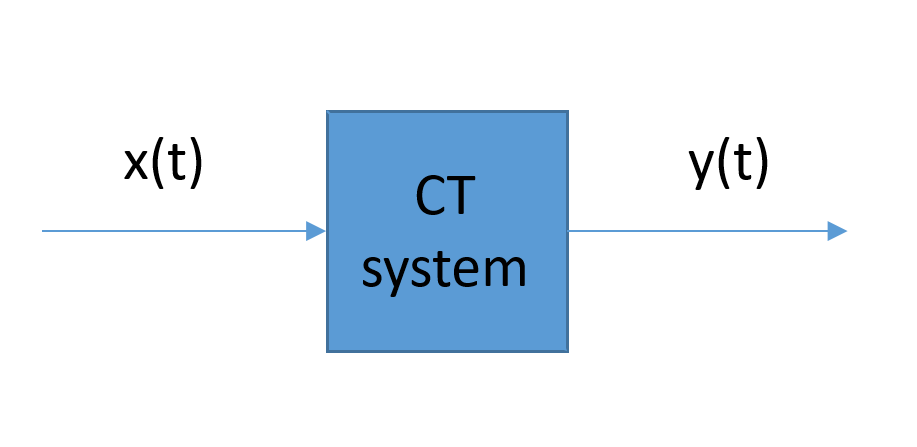
* A Discrete Time (DT) system is a system where the input is a DT signal and results in a DT output.

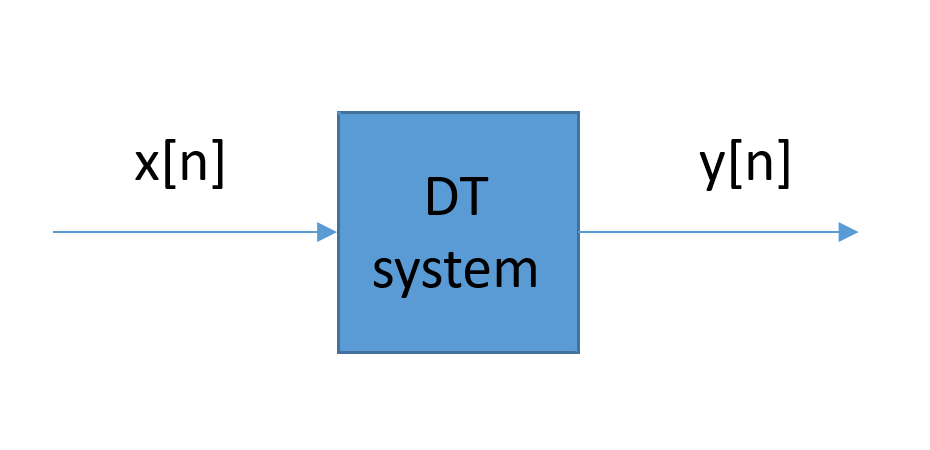

* A CT system behavior can be represented using a differential equation.

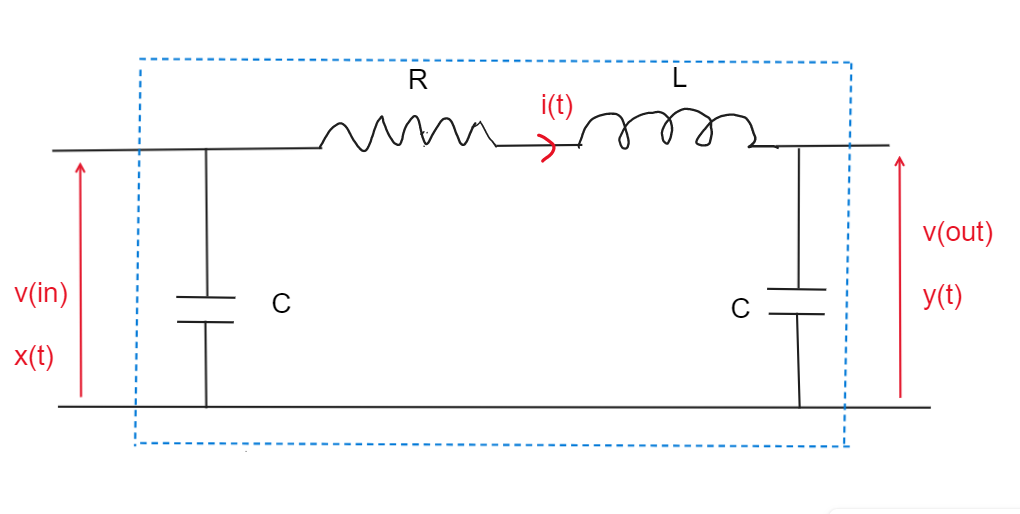


\begin{align}
    Vin(t) = R.i(t) + L\frac{di(t)}{dx} + Vout(t) \\
    Vout(t) = \frac{1}{C}∫_{-∞}^{t}i(t)dt \\
    i(t) = C.\frac{dVout(t)}{dt} \\

    Vin(t) = RC\frac{dVout(t)}{dt} + LC\frac{d^{2}Vout}{dt^{2}} + Vout(t) \\
    x(t) = RC\frac{dy(t)}{dt} + LC\frac{d^{2}y}{dt^{2}} + y(t) \\
\end{align}


Example:-
A DT system behavior can be represented by a difference equation

Bank balance $ = y[n]$
Net deposit $ = x[n] =$ Deposit - Withdraval
$y[n] = y[n-1] + αy[n-1] + x[n]$

where $α$ is the interest rate

# Interconnection between systems

* Cascade (series) interconnection

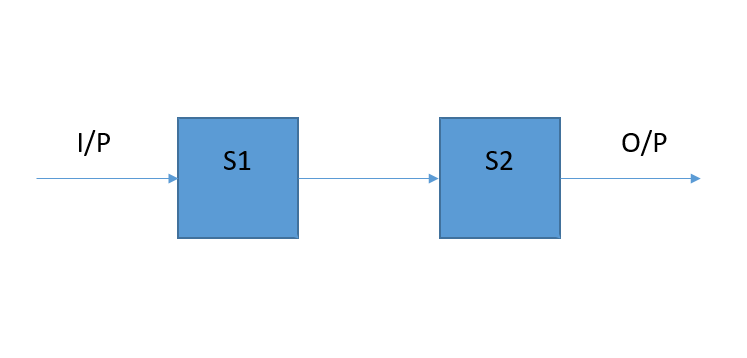

* Parallel connection

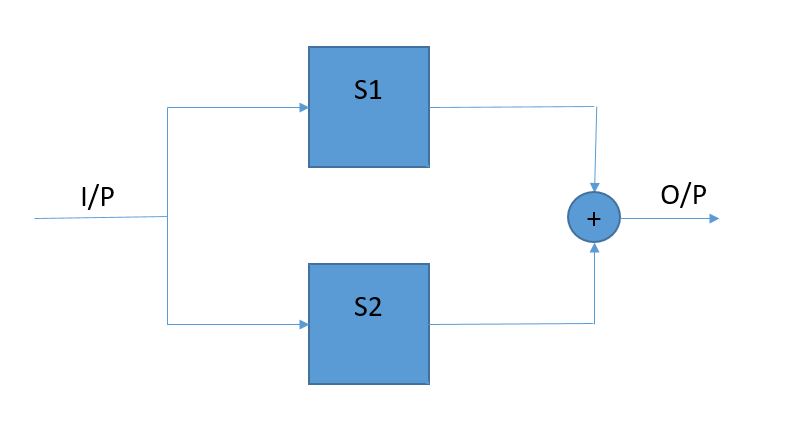

* Series Parallel connection 

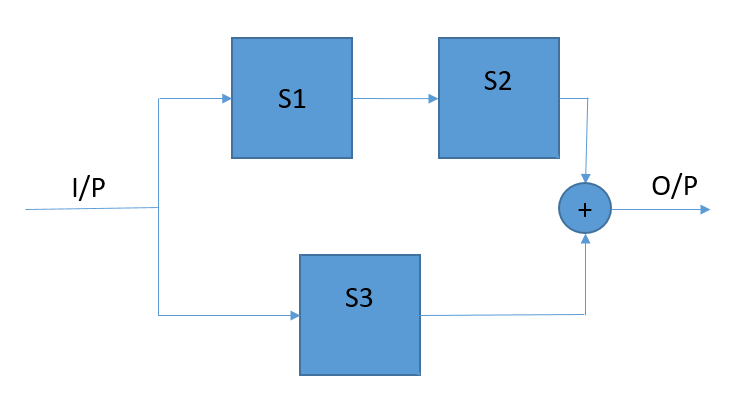

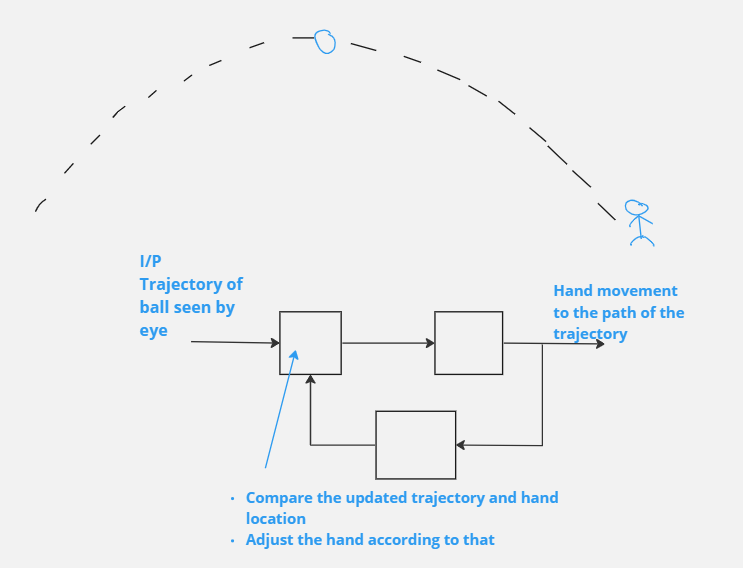



## Feedback systems

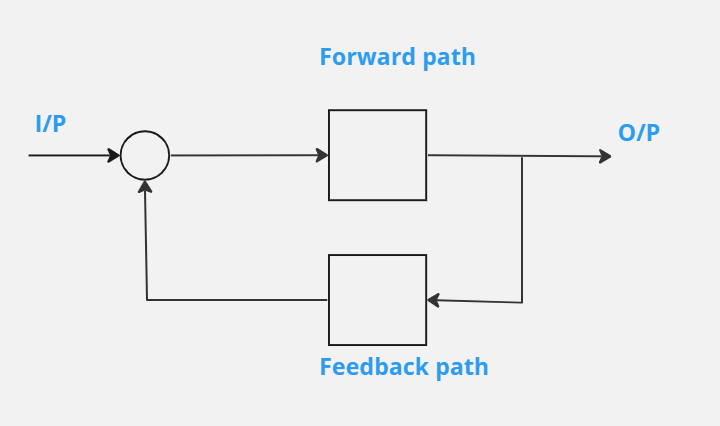



## Basic System Properties

01) System with or without memory

* A system is without if the O/P at a certain time instant only depends on the I/P at the same time instant 

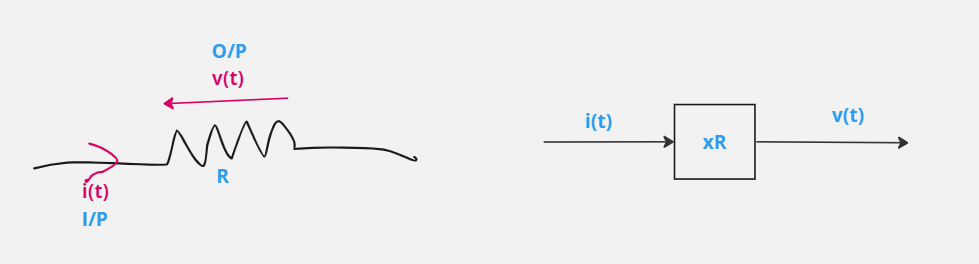

* In a system with memory, O/P at the sertain time instant depends on the input at the same time instant and previous time instances

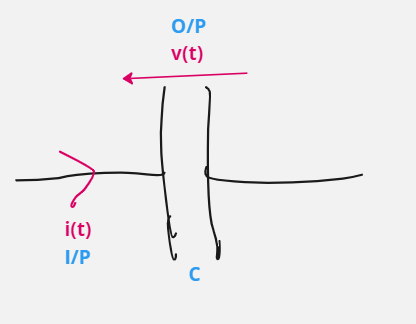

\begin{align}
V(t) &= ∫_{-∞}^{t}i(t)dt
\end{align}

Accumilator

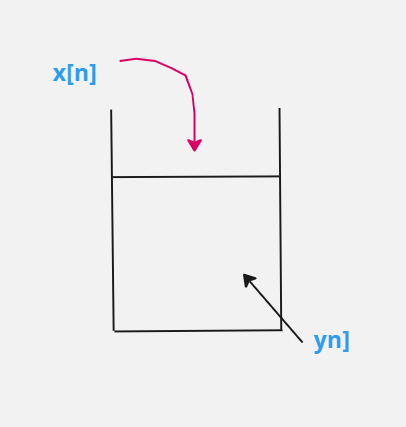

\begin{align}
    y[n] &= Σ_{k = -∞}^{n}x[k] \\
    y[n] &= x[n] + Σ_{k = -∞}^{n-1}x[k] \\
    y[n] &= x[n] + y[n-1]
\end{align}

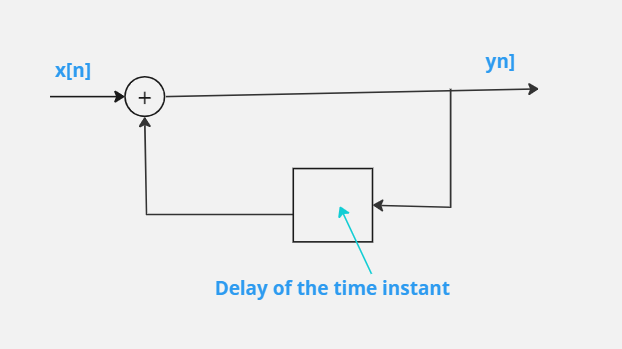


02) Invertibility and inverse system

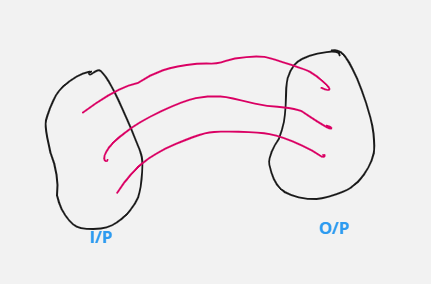

A system is invertible if there is a one-to-one correspondance between I/P and O/P

If the system is invertible, there exists an inverse system

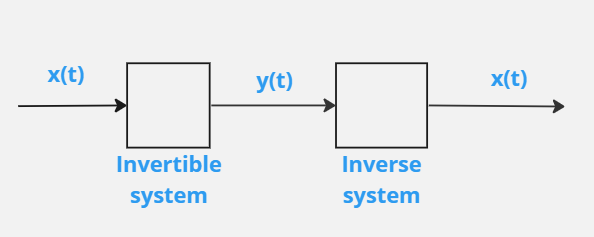

Example:- $y(t) = 2x(t)$

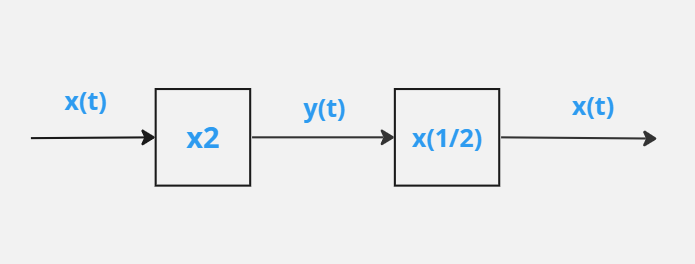

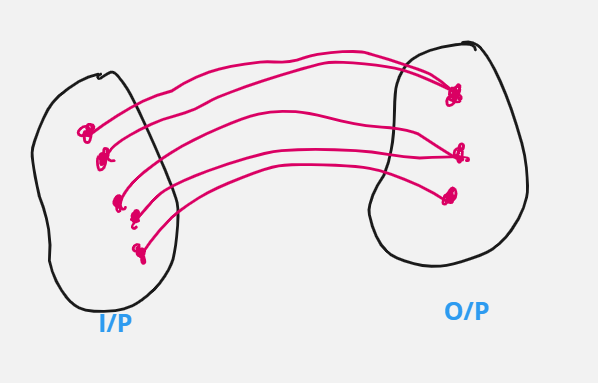

In a non invertible system, there is no one-to-one mapping between the I/P and O/P.

03) Time Invariance

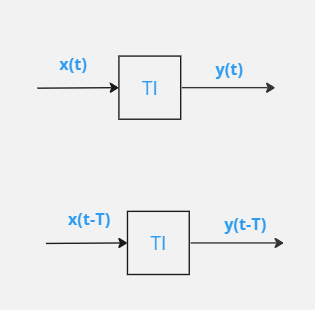

System behaviour does not depend on the time.

1) $y(t) = tx(t)$ where $x(t) = δ(t)$

\begin{align}
    x(t) &= δ(t) \\
    x(t-T) &= δ(t-T)
\end{align}

Configuration 1

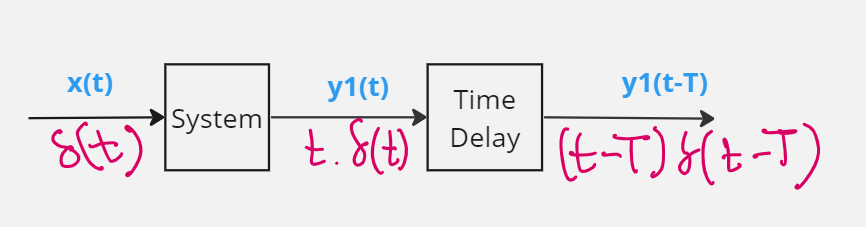

considering configuration 1;

\begin{align}
    y_1(t) &= t.δ(t) \\
    y_1(t-T) &= (t-T).δ(t-T) \ \ \ -----A
\end{align}

Configuration 2

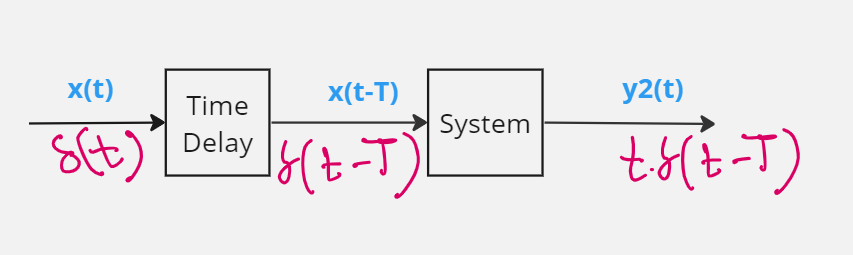

considering configuration2;

\begin{align}
    y_2(t) &= t.δ(t-T) \ \ \ -----B
\end{align}

Hence, result $A \not= B$ violates the condition to be time invariant.
So that,
$y(t) = tx(t)$ is time variant

2) $y(t) = sin[x(t)]$

Configuration 1

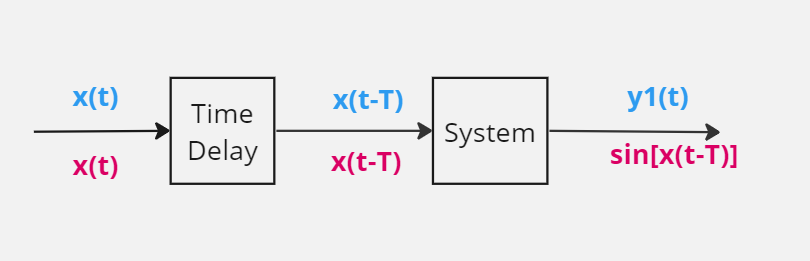

considering configuration 1;

\begin{align}
    y_1(t) &= sin[x(t-T)] \ \ \ -----A
\end{align}

Configuration 2

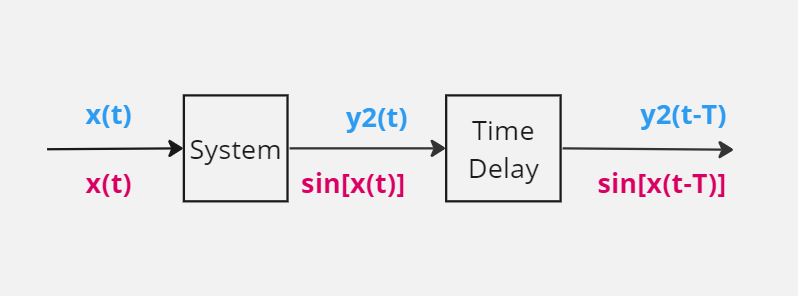

considering configuration 2;
\begin{align}
    y_2(t) &= sin[x(t)] \\
    y_2(t) &= sin[x(t-T)] \ \ \ -----B
\end{align}

Hence, $A = B$

Thus, $y(t) = sin[x(t)]$ is time invariant

Scaling in time

Consider the signals below.



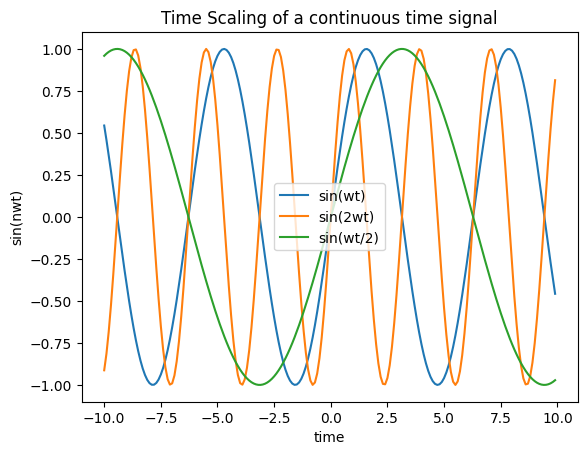

In [14]:
t = np.arange(-10, 10, 0.1)
y1 = np.sin(t)
y2 = np.sin(2*t)
y3 = np.sin(t/2)

plt.plot(t, y1, t, y2, t, y3)
plt.title('Time Scaling of a continuous time signal')
plt.xlabel('time')
plt.ylabel('sin(nwt)')
plt.legend(['sin(wt)', 'sin(2wt)', 'sin(wt/2)'])
plt.show()

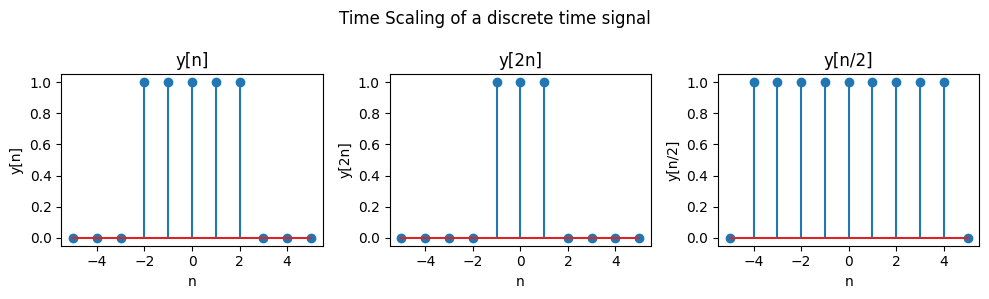

In [33]:
n= [-5,-4,-3,-2,-1,0,1,2,3,4,5]
y1 = [0,0,0,1,1,1,1,1,0,0,0]
y2 = [0,0,0,0,1,1,1,0,0,0,0]
y3 = [0,1,1,1,1,1,1,1,1,1,0]

fig, axs = plt.subplots(1, 3, figsize=(10, 3))  
axs[0].stem(n, y1)
axs[1].stem(n, y2)
axs[2].stem(n, y3)


axs[0].set_title('y[n]')
axs[1].set_title('y[2n]')
axs[2].set_title('y[n/2]')
axs[0].set_xlabel('n')
axs[0].set_ylabel('y[n]')
axs[1].set_xlabel('n')
axs[1].set_ylabel('y[2n]')
axs[2].set_xlabel('n')
axs[2].set_ylabel('y[n/2]')

fig.suptitle('Time Scaling of a discrete time signal')
plt.tight_layout()

plt.show()